# Superconductor Critical Temperature Regression Analysis

In this project we perform a regression analysis on a superconductivity dataset. We will load and explore the data, visualize the relationship between selected physical features and the critical temperature $T_c$, implement  linear regression with gradient descent and explicitly compute and plot the mean squared error cost function and its optimization path, construct several multi-feature linear and polynomial regression models using scikit-learn, compare their performance on training and test sets, and examine the largest prediction errors to identify possible outliers or unusual samples.

## 1. Data Loading and Basic Exploration



In [1]:
# Loading dataset from Kaggle
import kagglehub
import pandas as pd
import os

path = kagglehub.dataset_download("munumbutt/superconductor-dataset")
os.listdir(path)
df = pd.read_csv(path + "/train.csv")
print(f"numer of samples: {df.shape[0]}, number of features: {df.shape[1]}")

100%|██████████| 7.57M/7.57M [00:01<00:00, 7.79MB/s]

Extracting files...


numer of samples: 21263, number of features: 82


In [2]:
df.head()

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                   4         88.944468             57.862692   
1                   5         92.729214             58.518416   
2                   4         88.944468             57.885242   
3                   4         88.944468             57.873967   
4                   4         88.944468             57.840143   

   gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0          66.361592              36.116612             1.181795   
1          73.132787              36.396602             1.449309   
2          66.361592              36.122509             1.181795   
3          66.361592              36.119560             1.181795   
4          66.361592              36.110716             1.181795   

   wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
0                 1.062396          122.90607              31.794921   
1                 1.057755          122.90607              36.161939   
2                 0.975980          122.90607              35.741099   
3                 1.022291          122.90607              33.768010   
4                 1.129224          122.90607              27.848743   

   std_atomic_mass  ...  wtd_mean_Valence  gmean_Valence  wtd_gmean_Valence  \
0        51.968828  ...          2.257143       2.213364           2.219783   
1        47.094633  ...          2.257143       1.888175           2.210679   
2        51.968828  ...          2.271429       2.213364           2.232679   
3        51.968828  ...          2.264286       2.213364           2.226222   
4        51.968828  ...          2.242857       2.213364           2.206963   

   entropy_Valence  wtd_entropy_Valence  range_Valence  wtd_range_Valence  \
0         1.368922             1.066221              1           1.085714   
1         1.557113             1.047221              2           1.128571   
2         1.368922             1.029175              1           1.114286   
3         1.368922             1.048834              1           1.100000   
4         1.368922             1.096052              1           1.057143   

   std_Valence  wtd_std_Valence  critical_temp  
0     0.433013         0.437059           29.0  
1     0.632456         0.468606           26.0  
2     0.433013         0.444697           19.0  
3     0.433013         0.440952           22.0  
4     0.433013         0.428809           23.0  

[5 rows x 82 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

In [4]:
df.describe()

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
count        21263.000000      21263.000000          21263.000000   
mean             4.115224         87.557631             72.988310   
std              1.439295         29.676497             33.490406   
min              1.000000          6.941000              6.423452   
25%              3.000000         72.458076             52.143839   
50%              4.000000         84.922750             60.696571   
75%              5.000000        100.404410             86.103540   
max              9.000000        208.980400            208.980400   

       gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
count       21263.000000           21263.000000         21263.000000   
mean           71.290627              58.539916             1.165608   
std            31.030272              36.651067             0.364930   
min             5.320573               1.960849             0.000000   
25%            58.041225              35.248990             0.966676   
50%            66.361592              39.918385             1.199541   
75%            78.116681              73.113234             1.444537   
max           208.980400             208.980400             1.983797   

       wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
count             21263.000000       21263.000000           21263.000000   
mean                  1.063884         115.601251              33.225218   
std                   0.401423          54.626887              26.967752   
min                   0.000000           0.000000               0.000000   
25%                   0.775363          78.512902              16.824174   
50%                   1.146783         122.906070              26.636008   
75%                   1.359418         154.119320              38.356908   
max                   1.958203         207.972460             205.589910   

       std_atomic_mass  ...  wtd_mean_Valence  gmean_Valence  \
count     21263.000000  ...      21263.000000   21263.000000   
mean         44.391893  ...          3.153127       3.056536   
std          20.035430  ...          1.191249       1.046257   
min           0.000000  ...          1.000000       1.000000   
25%          32.890369  ...          2.116732       2.279705   
50%          45.123500  ...          2.618182       2.615321   
75%          59.322812  ...          4.026201       3.727919   
max         101.019700  ...          7.000000       7.000000   

       wtd_gmean_Valence  entropy_Valence  wtd_entropy_Valence  range_Valence  \
count       21263.000000     21263.000000         21263.000000   21263.000000   
mean            3.055885         1.295682             1.052841       2.041010   
std             1.174815         0.393155             0.380291       1.242345   
min             1.000000         0.000000             0.000000       0.000000   
25%             2.091251         1.060857             0.775678       1.000000   
50%             2.434057         1.368922             1.166532       2.000000   
75%             3.914868         1.589027             1.330801       3.000000   
max             7.000000         2.141963             1.949739       6.000000   

       wtd_range_Valence   std_Valence  wtd_std_Valence  critical_temp  
count       21263.000000  21263.000000     21263.000000   21263.000000  
mean            1.483007      0.839342         0.673987      34.421219  
std             0.978176      0.484676         0.455580      34.254362  
min             0.000000      0.000000         0.000000       0.000210  
25%             0.921454      0.451754         0.306892       5.365000  
50%             1.063077      0.800000         0.500000      20.000000  
75%             1.918400      1.200000         1.020436      63.000000  
max             6.992200      3.000000         3.000000     185.000000  

[8 rows x 82 columns]

# **Results:**

there is no NA in the dataset.

we can categorize the features:
- Number of Elements
- Atomic mass
- Fie
- Atomic Radius
- Density
- Electron Affinity
- FusionHeat
- Thermal Conductivity
- Valence

for each(except #elements) we have:

mean - wtd mean - gmean - wtd gmean - entropy - wtd entropy - range - wtd range - std - wtd std

and the target is: Critical Temp

# **Feature–Target Visualization (Raw Units, No Normalization)**


In [5]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

df['number_of_elements'].describe()
print(df['number_of_elements'].corr(df['critical_temp']))
px.box(df, x="number_of_elements", y="critical_temp")

0.6010685709560268


In [6]:
px.scatter(df, x=df["number_of_elements"], y=df["critical_temp"])

In [7]:
import numpy as np

features = ['atomic_mass','fie','atomic_radius','Density','ElectronAffinity','FusionHeat','ThermalConductivity','Valence']

sub_features = np.array([['mean','gmean','entropy','range','std'],
                        ['wtd_mean','wtd_gmean','wtd_entropy','wtd_range','wtd_std']])

In [8]:
def scatter10(dataset, feature, color='blue'):
  fig,axes = plt.subplots(2,5,figsize=(30,10))
  fig.suptitle(feature, fontsize=28)

  for i in range(2):
    for j in range(5):
      axes[i,j].scatter(dataset[str(sub_features[i,j])+'_'+feature],dataset['critical_temp'], alpha=0.3, s=4, color=color)
      axes[i,j].set_xlabel(str(sub_features[i,j])+'_'+feature)
      axes[i,j].set_ylabel('critical_temp')

      corr = df[str(sub_features[i,j])+'_'+feature].corr(df['critical_temp'])
      axes[i,j].set_title(f'correlation: {corr:.2f}', fontsize=15)

  plt.subplots_adjust(hspace=0.4)
  plt.show()

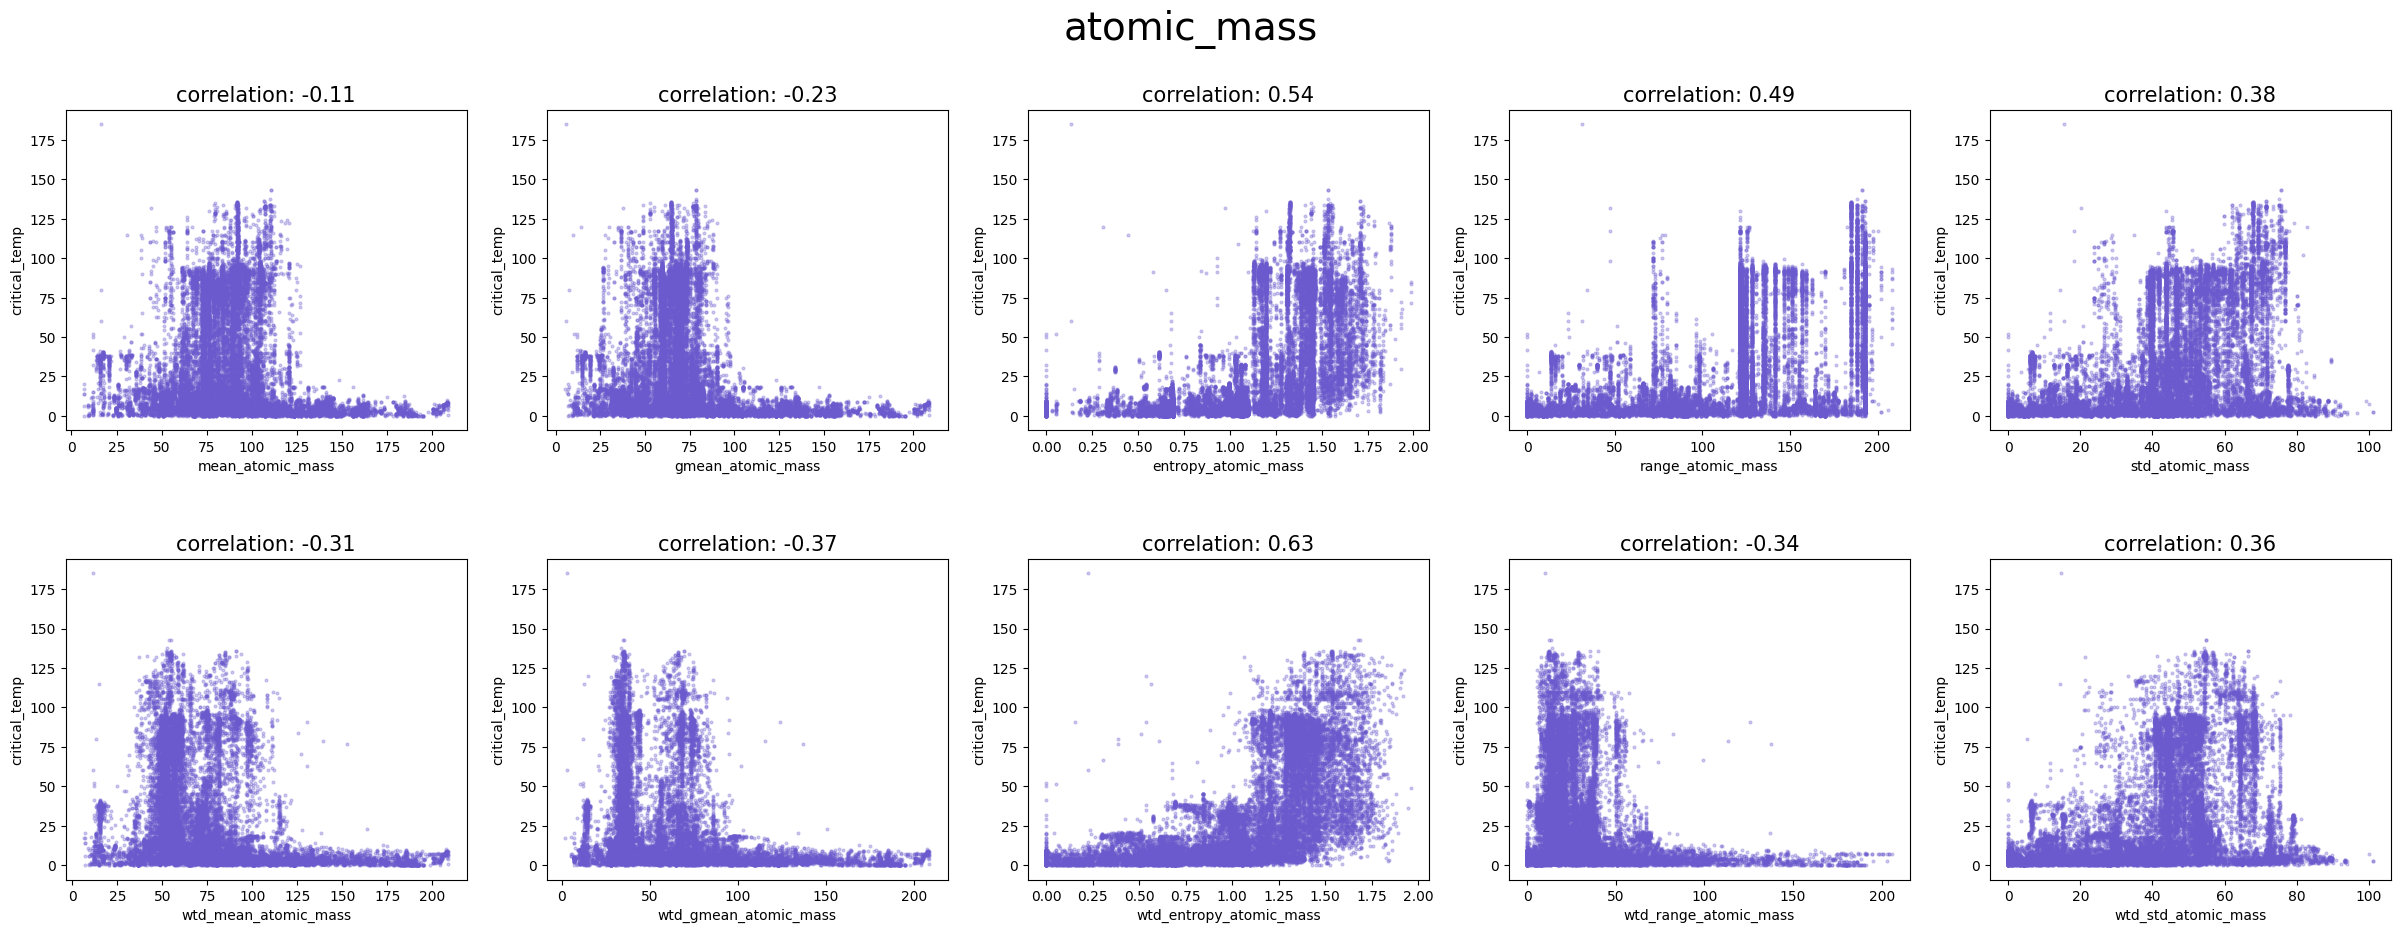

In [9]:
scatter10(df,features[0],'slateblue')

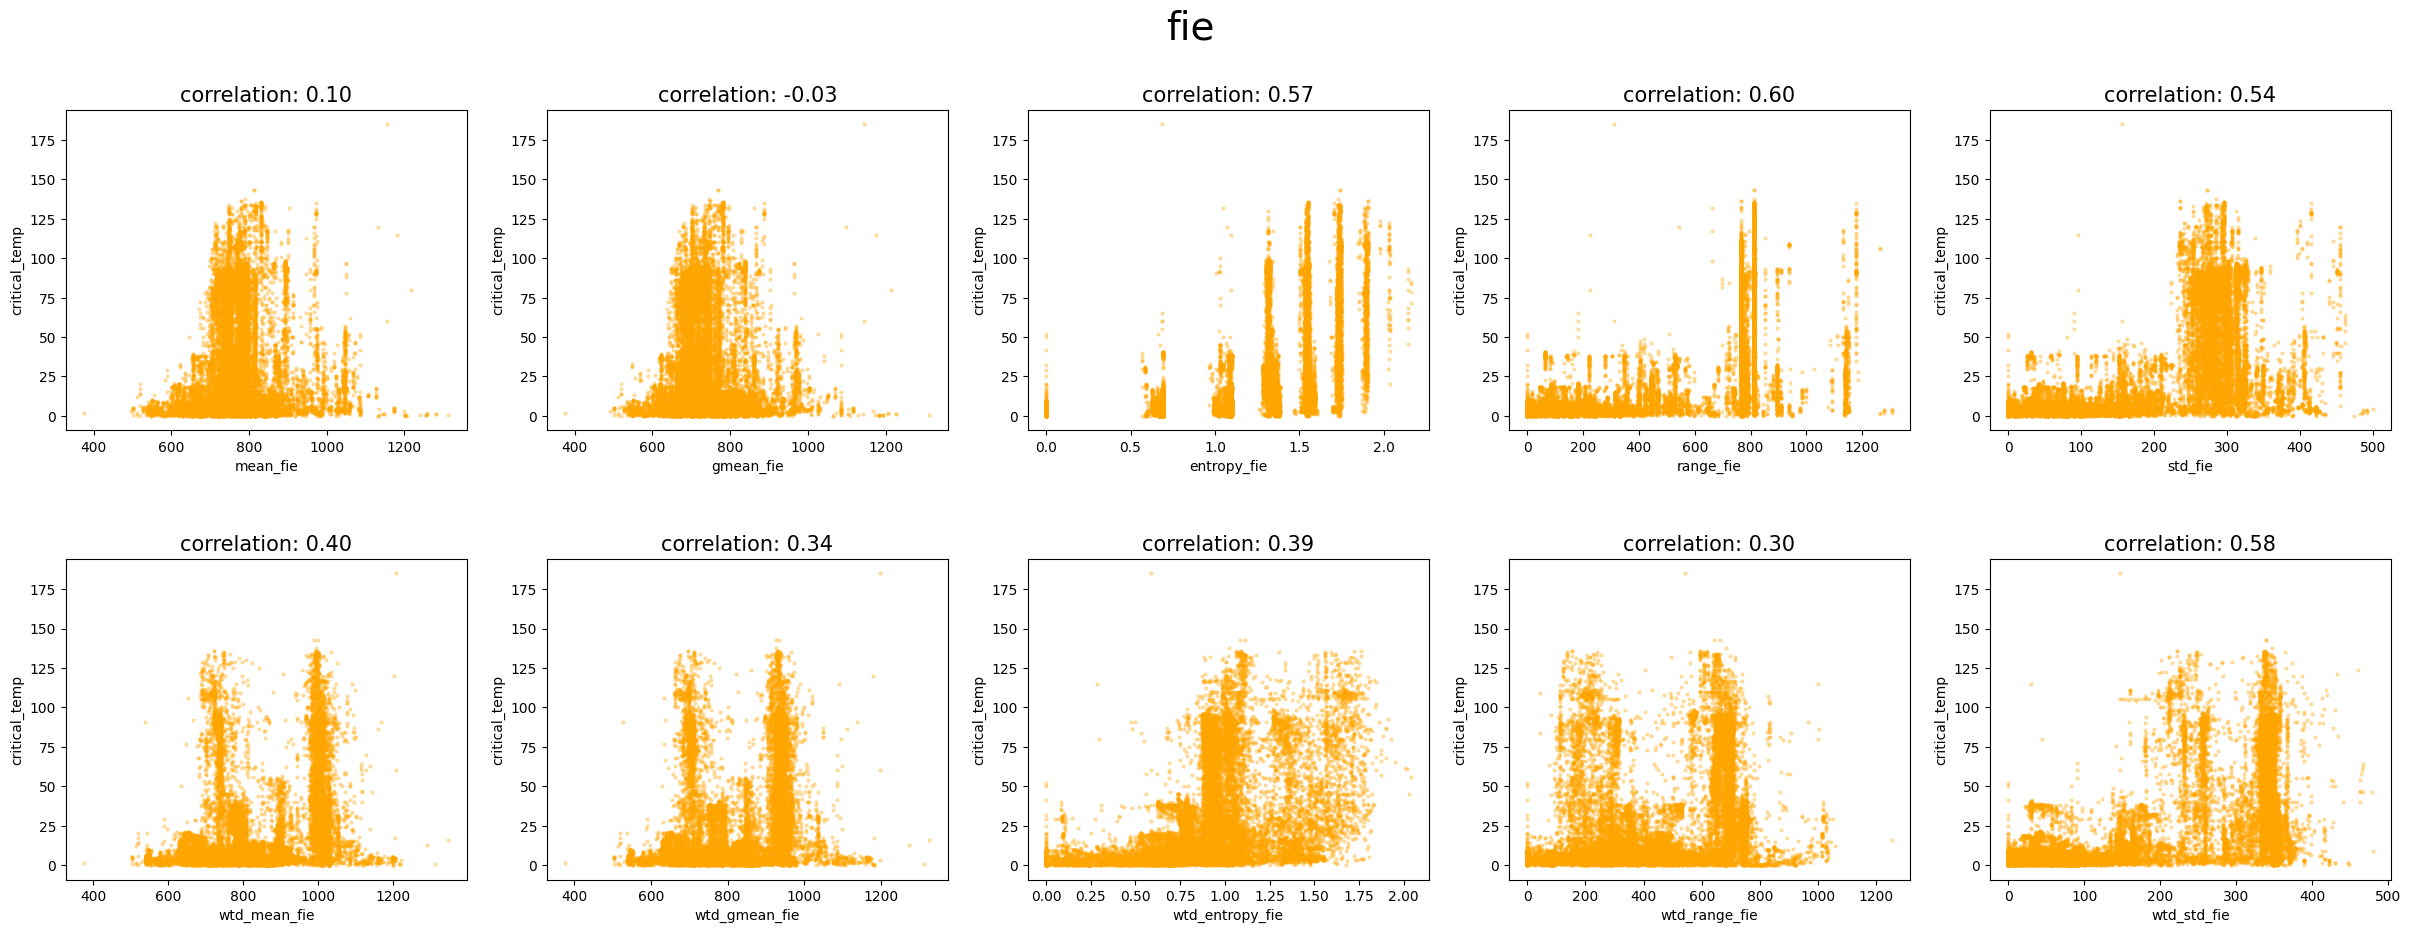

In [10]:
scatter10(df,features[1],'orange')

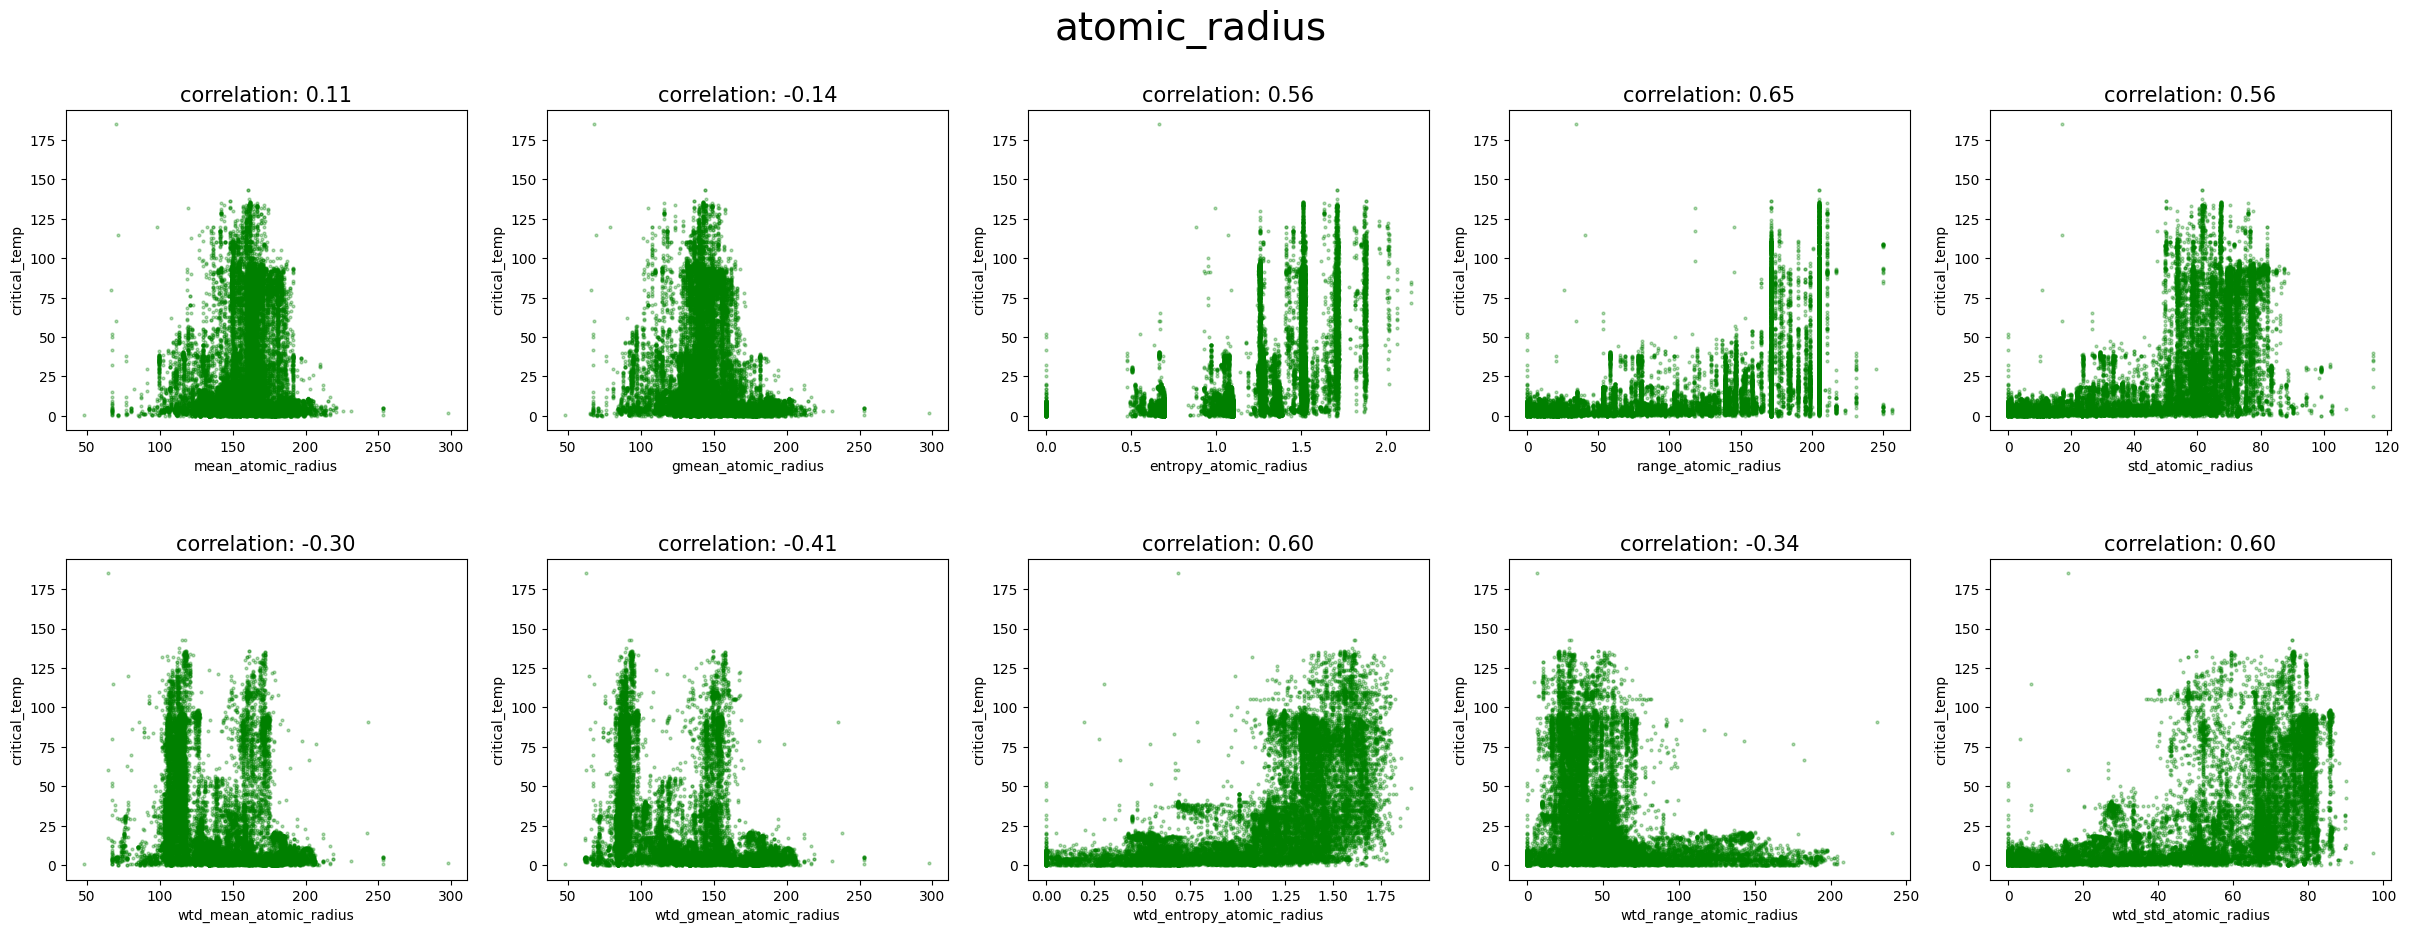

In [11]:
scatter10(df,features[2],'green')

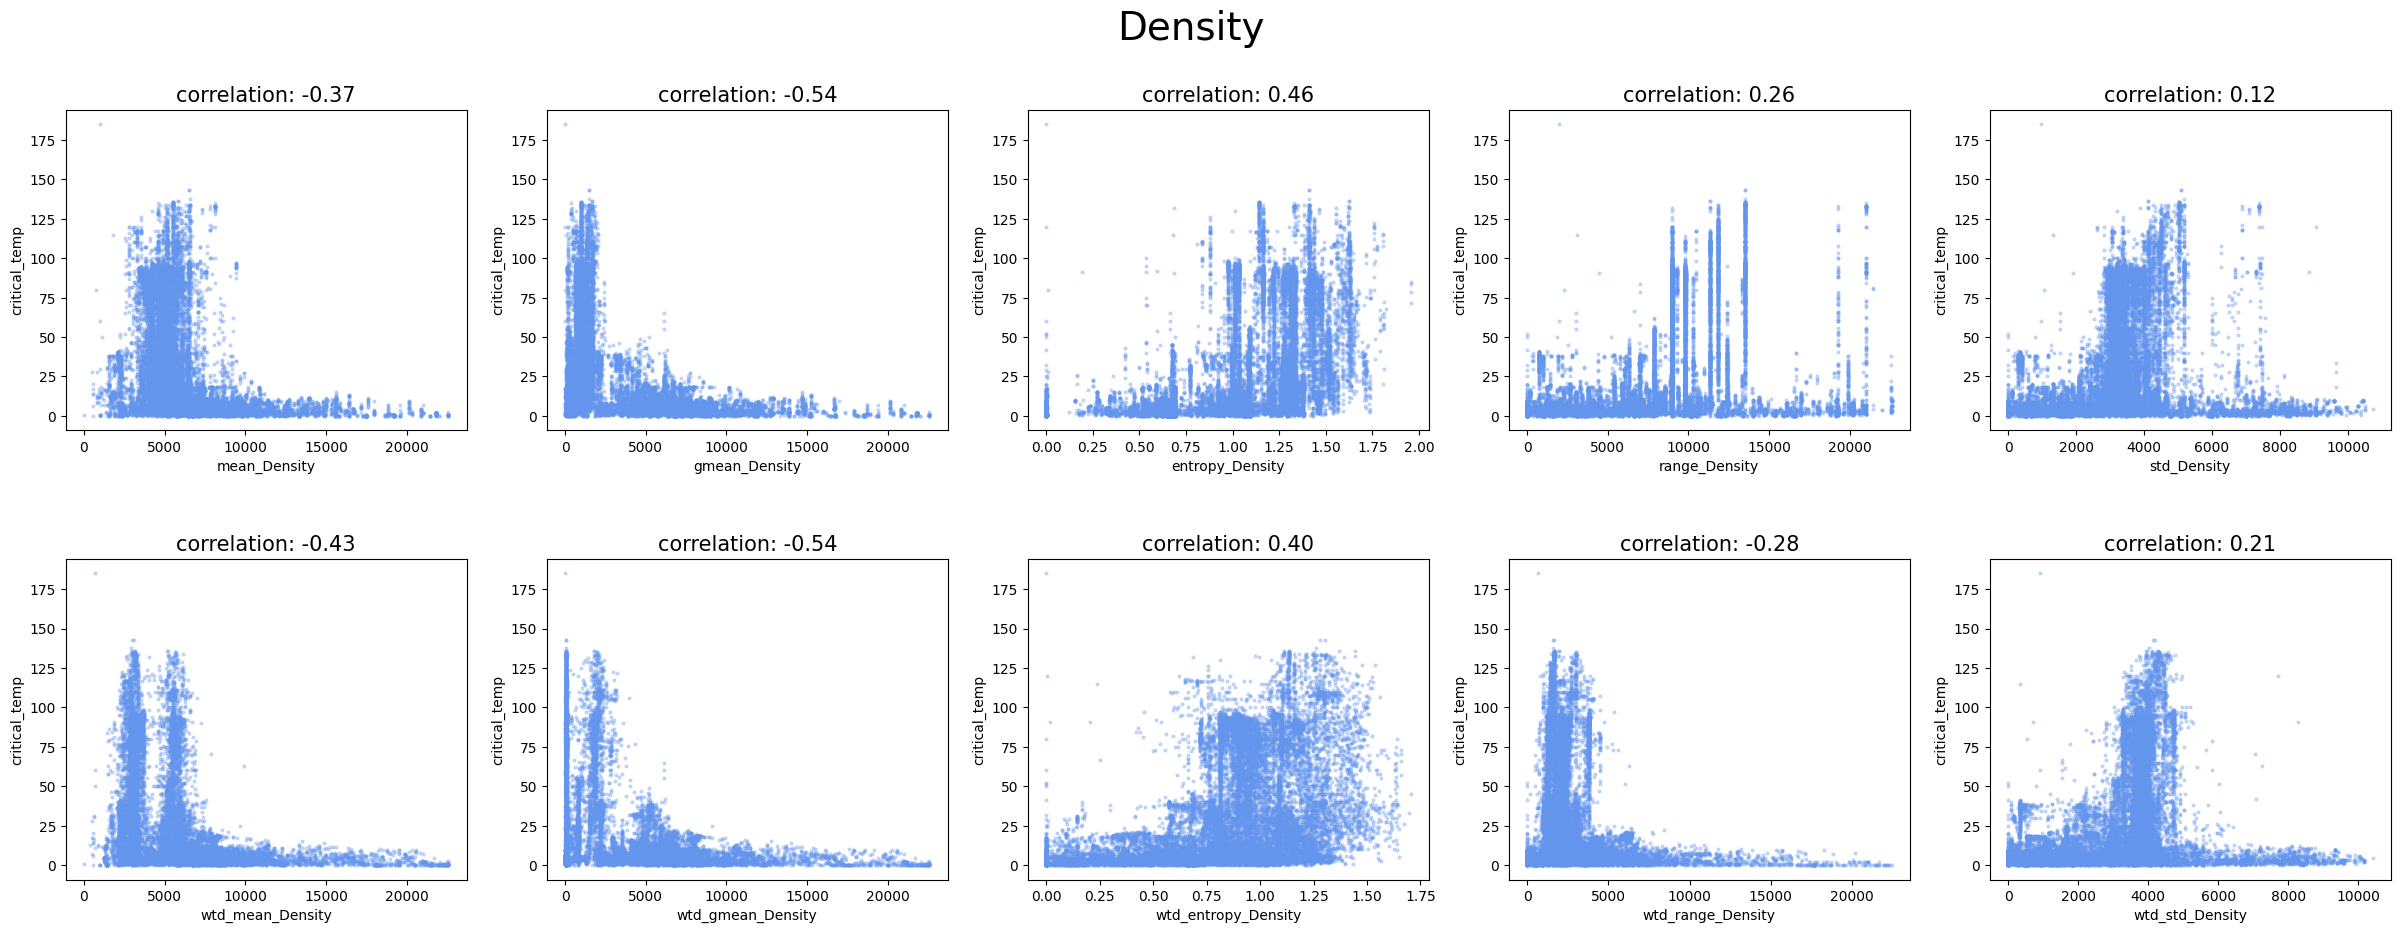

In [12]:
scatter10(df,features[3],'cornflowerblue')

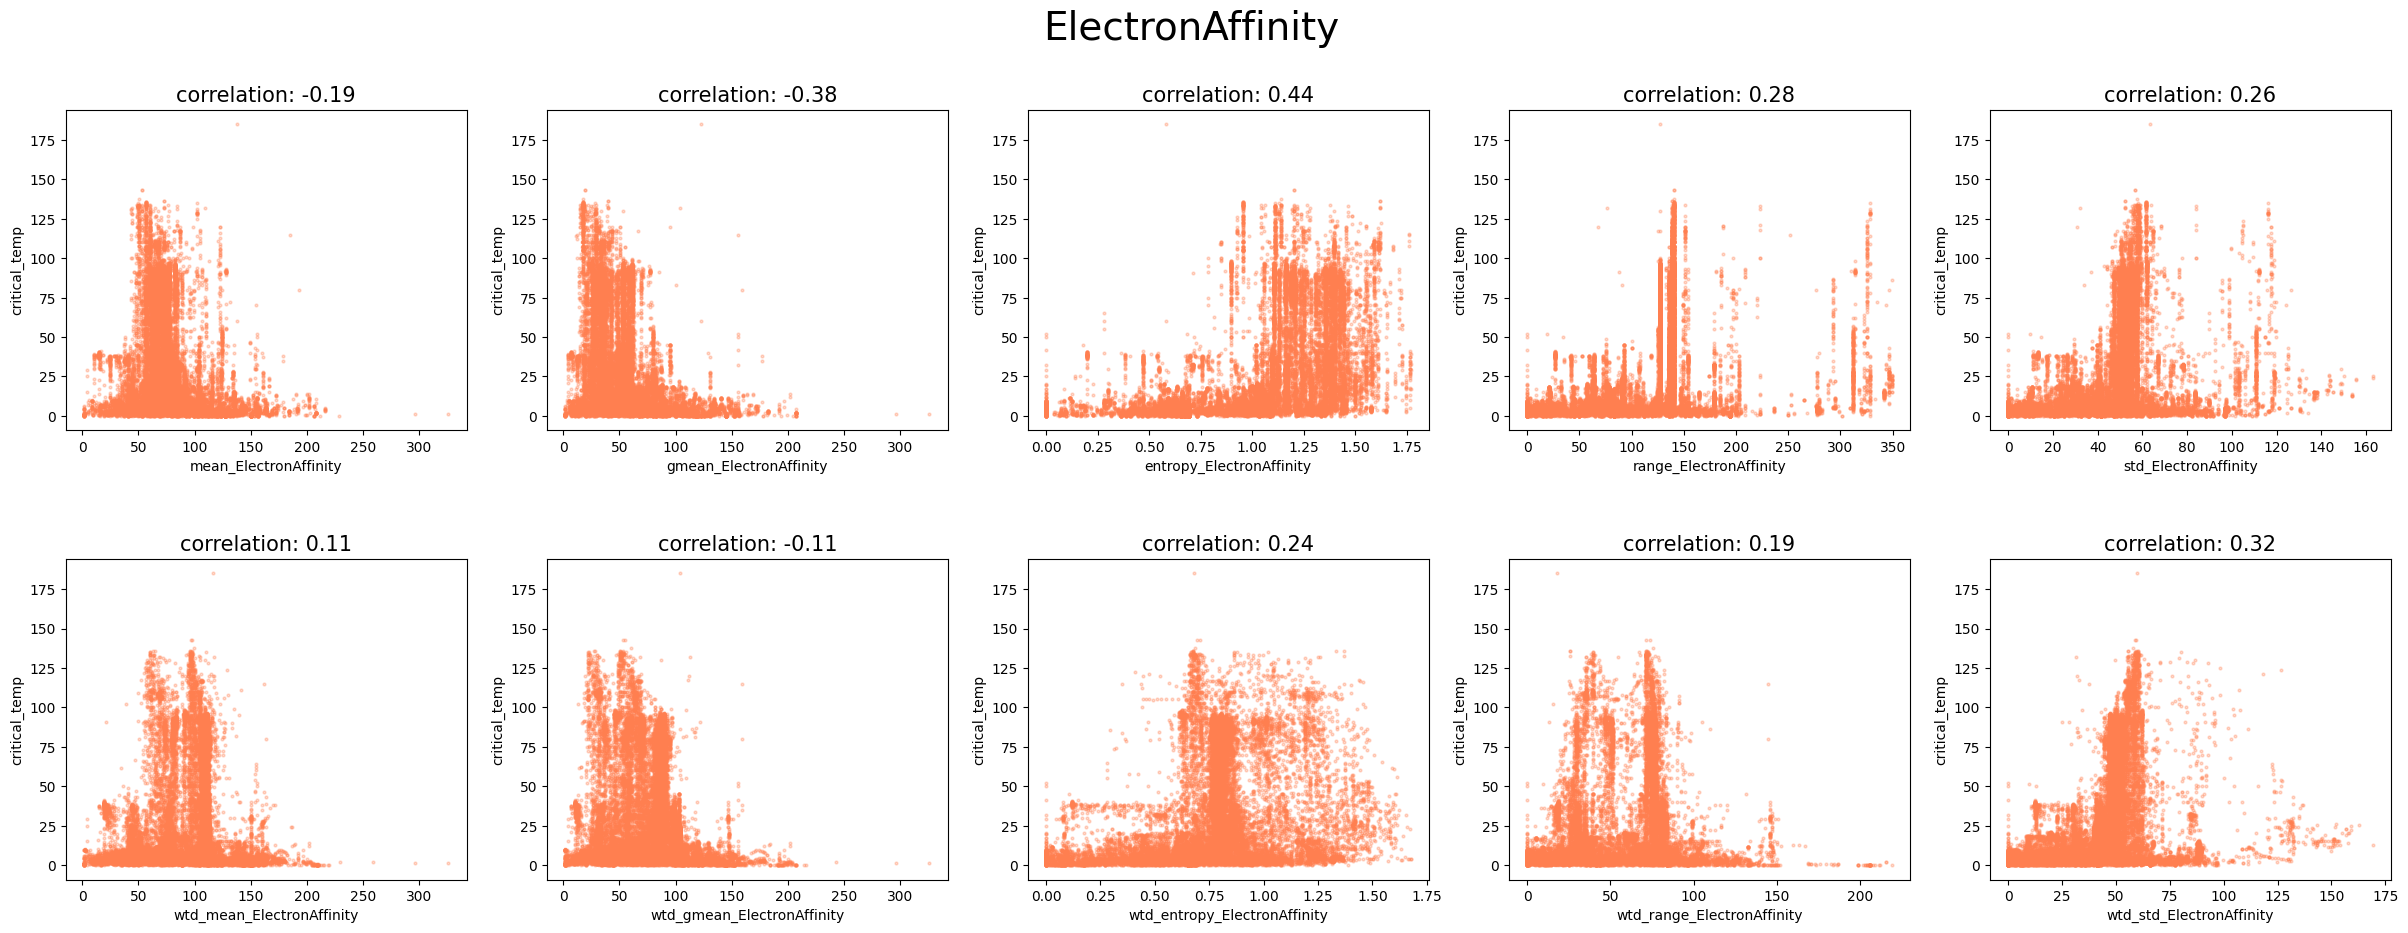

In [13]:
scatter10(df,features[4],'coral')

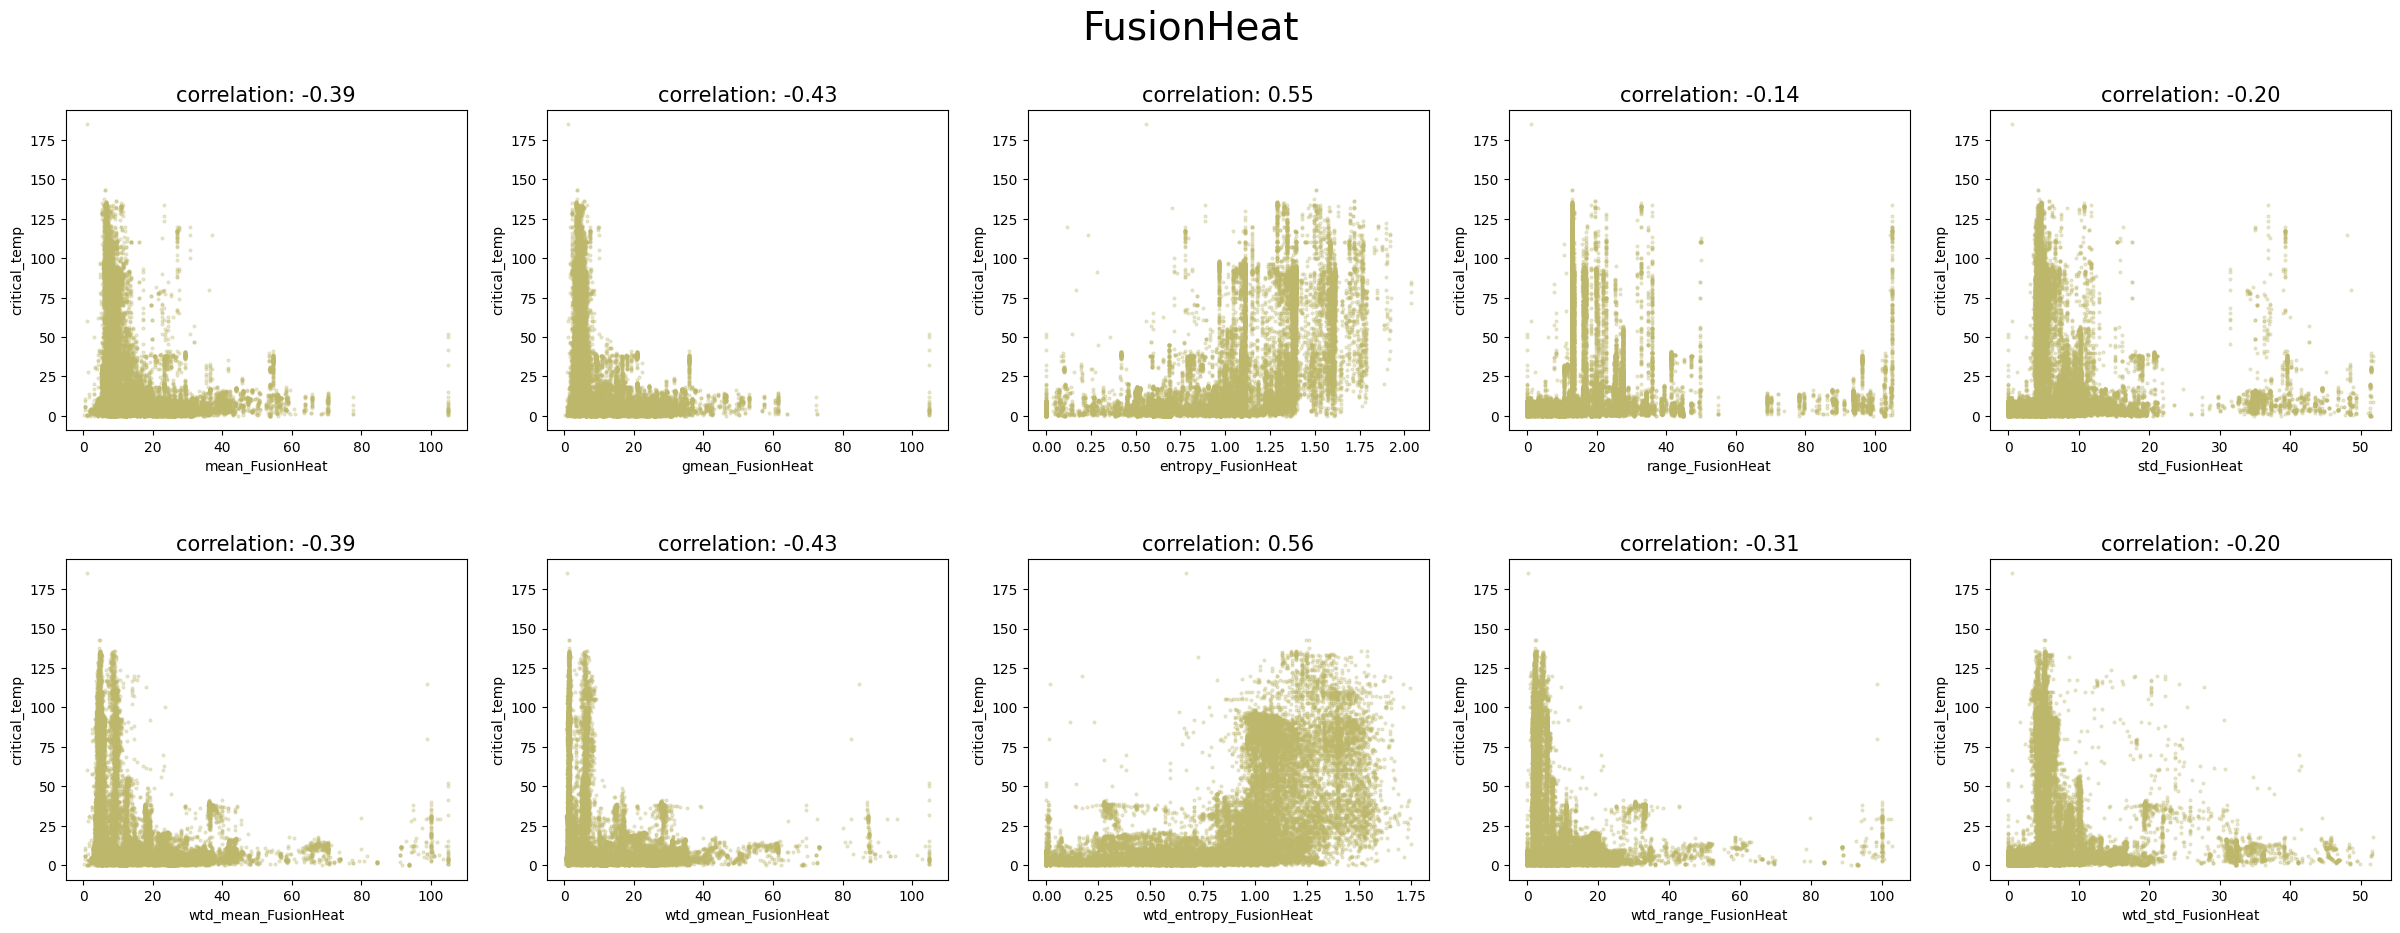

In [14]:
scatter10(df,features[5],'darkkhaki')

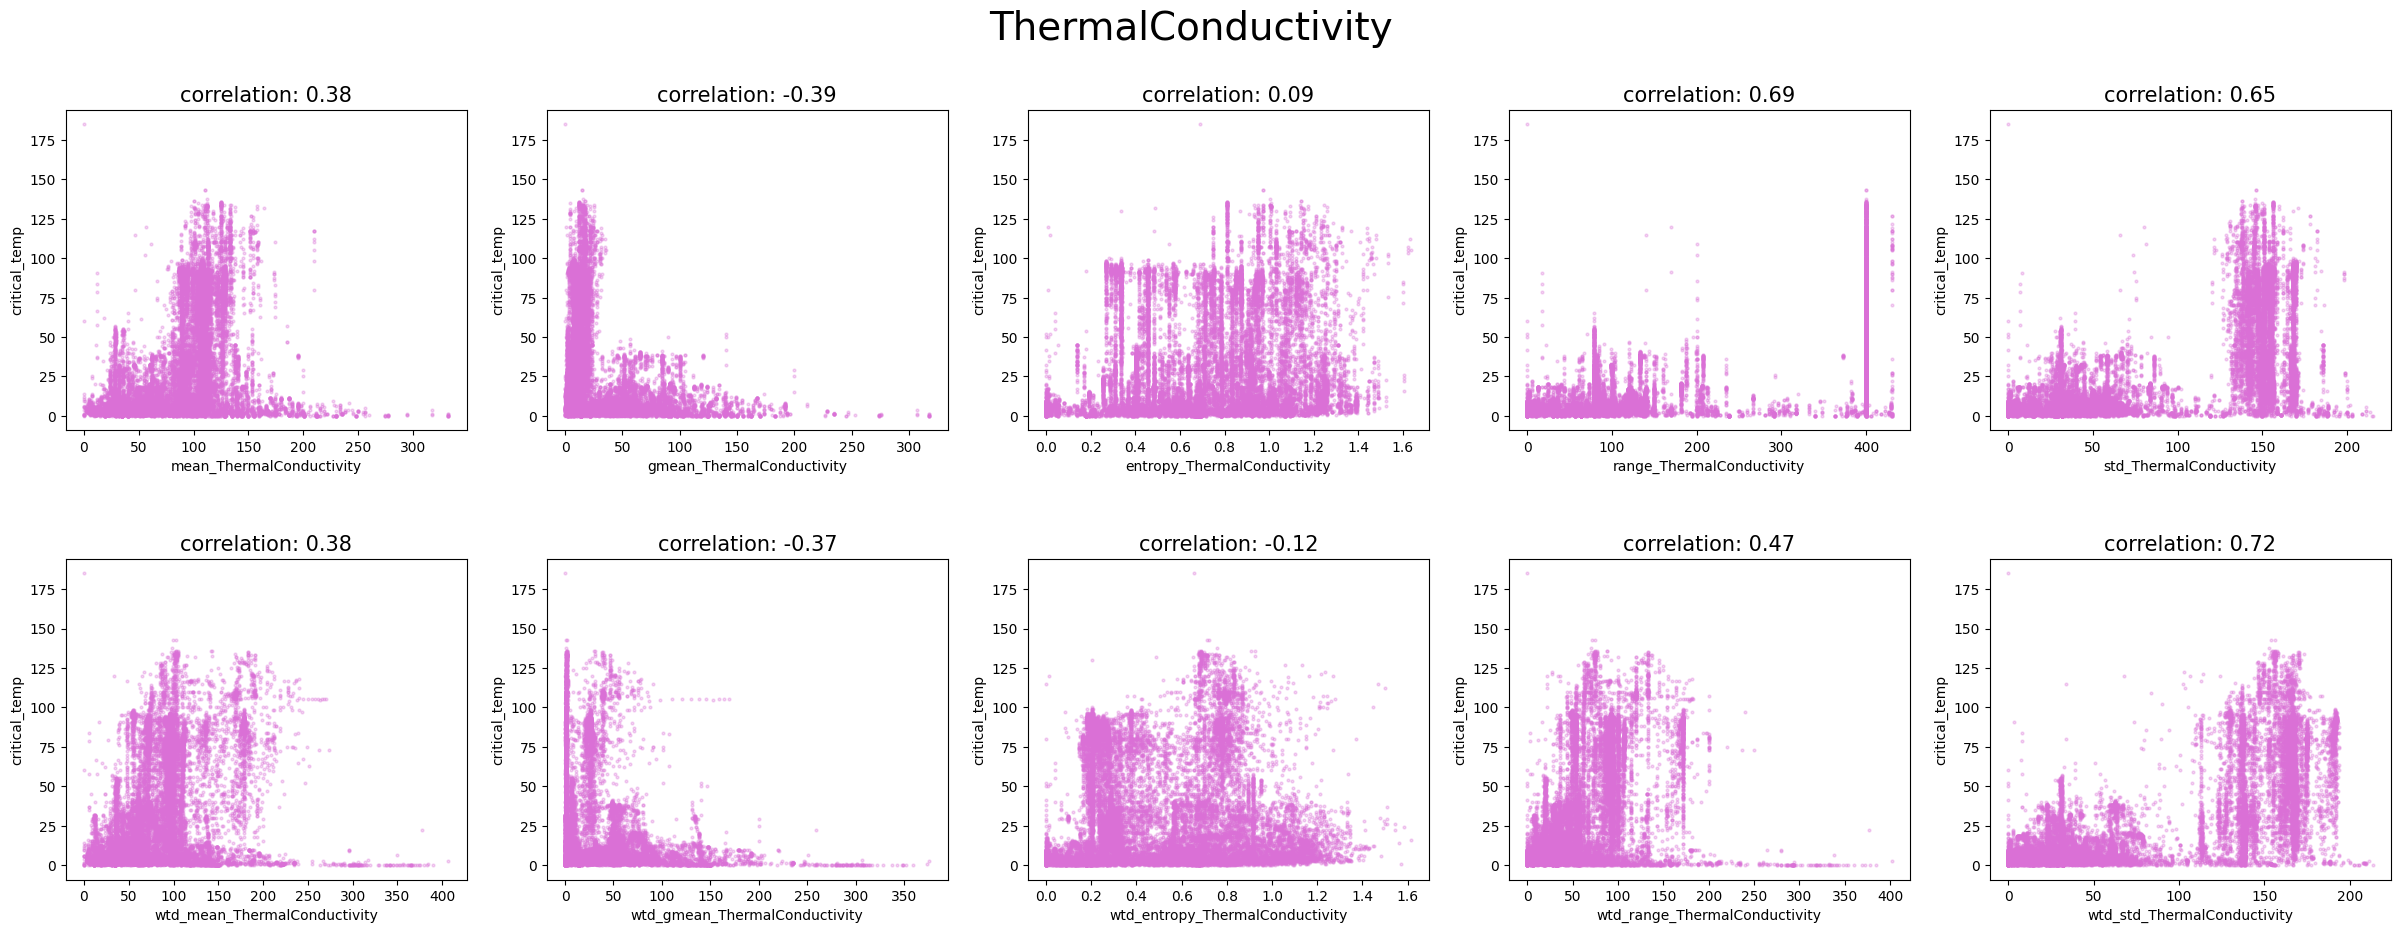

In [15]:
scatter10(df,features[6],'orchid')

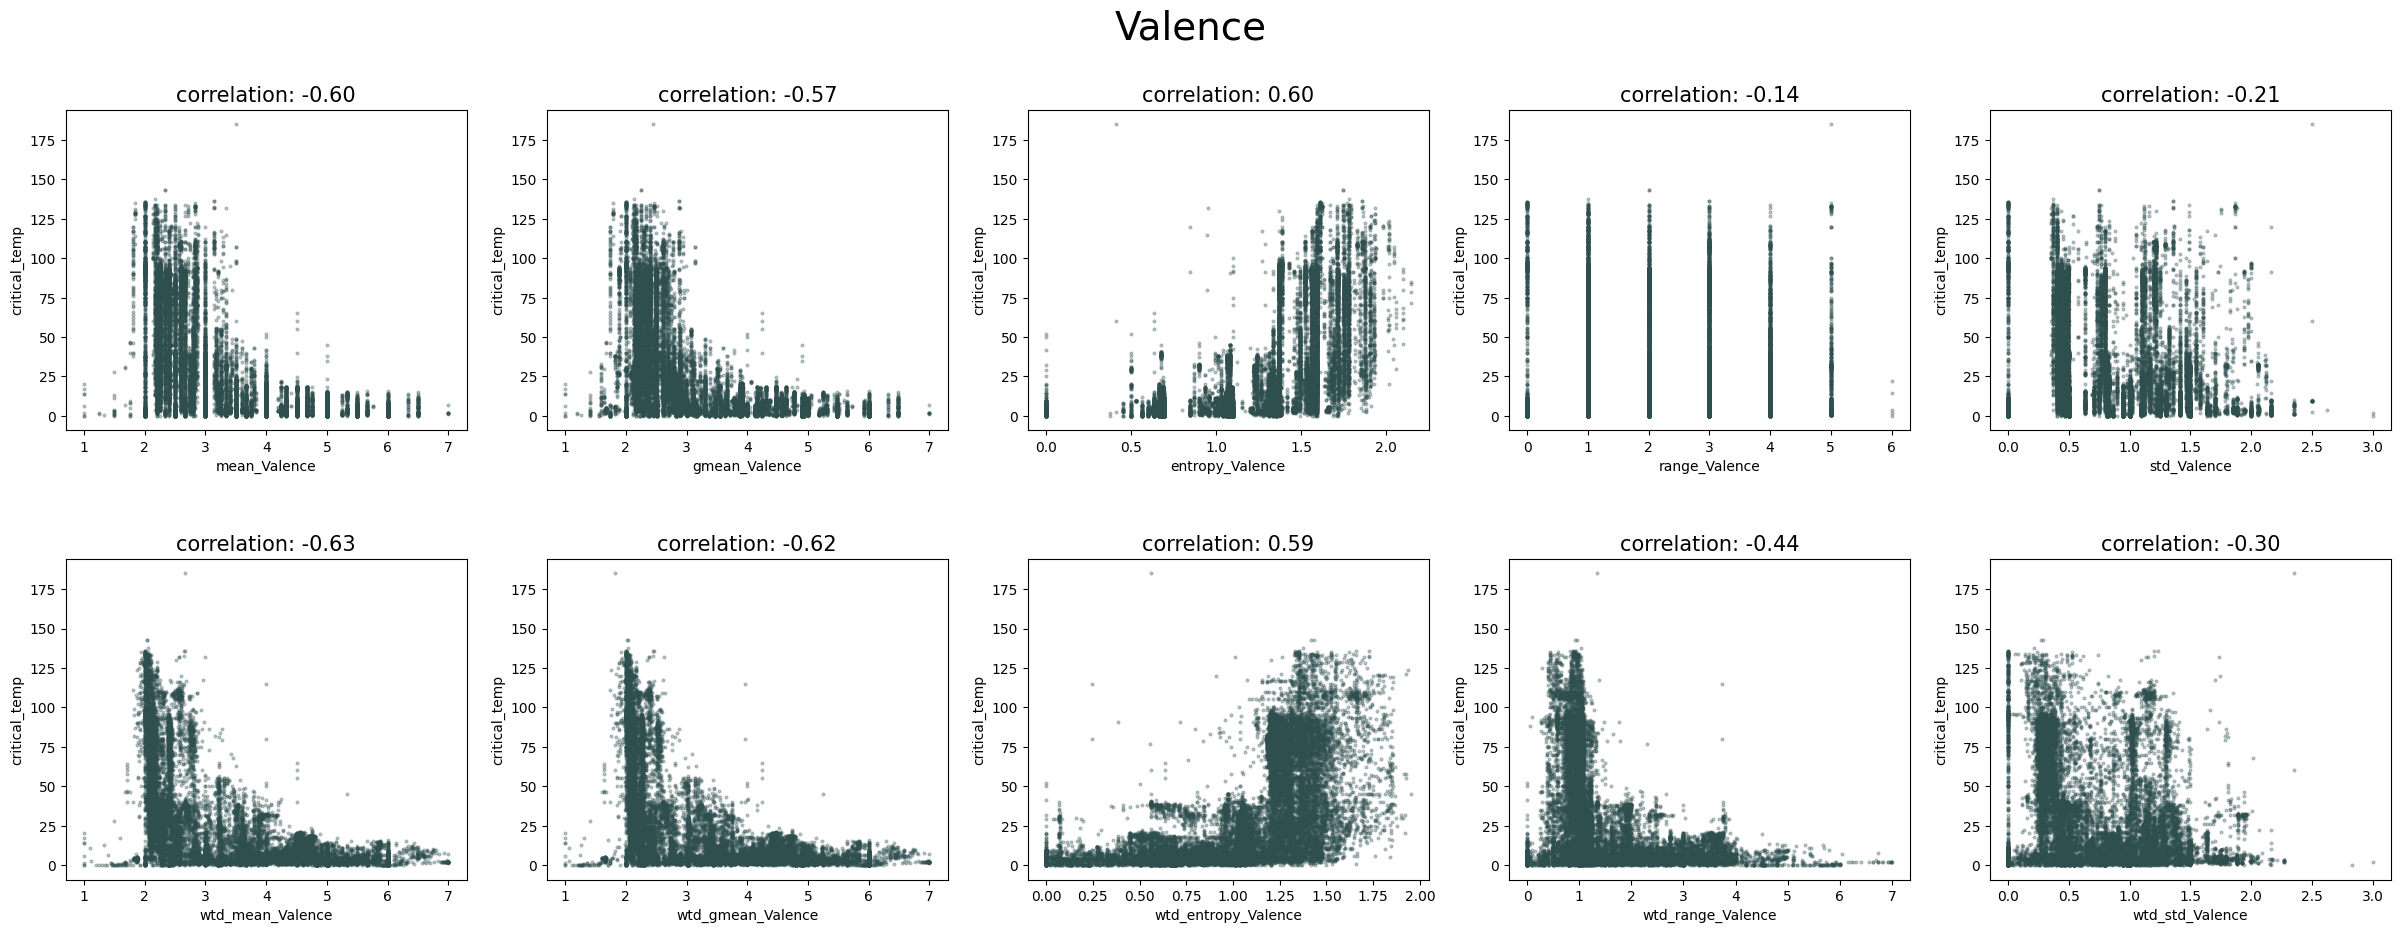

In [16]:
scatter10(df,features[7],'darkslategrey')

# **Defining Functions**

In [17]:
# model with no regularization

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

def grds(X_train, y_train, X_test, y_test):

  scaler = StandardScaler()
  X_train_norm = scaler.fit_transform(X_train)
  X_test_norm = scaler.transform(X_test)

  model = SGDRegressor(max_iter=3000)
  model.fit(X_train_norm, y_train)

  y_pred_train = model.predict(X_train_norm)
  train_r2 = r2_score(y_train, y_pred_train)
  train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
  # print(f"train r2: {train_r2:.3f}")
  # print(f"train rmse: {train_rmse:.3f}\n")

  y_pred_test = model.predict(X_test_norm)
  test_r2 = r2_score(y_test, y_pred_test)
  test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
  # print(f"test r2: {test_r2:.3f}")
  # print(f"test rmse: {test_rmse:.3f}\n")

  weights = model.coef_
  bias = model.intercept_

  return y_pred_train, y_pred_test, train_r2, train_rmse, test_r2, test_rmse, weights, bias

In [18]:
#model with regularization

def grds_reg(X_train, y_train, X_test, y_test):

  scaler = StandardScaler()
  X_train_norm = scaler.fit_transform(X_train)
  X_test_norm = scaler.transform(X_test)

  model = SGDRegressor(max_iter=30000, penalty='l2', alpha=1e-6, learning_rate='constant', eta0=0.001, random_state=42)
  model.fit(X_train_norm, y_train)

  y_pred_train = model.predict(X_train_norm)
  train_r2 = r2_score(y_train, y_pred_train)
  train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
  # print(f"train r2: {train_r2:.3f}")
  # print(f"train rmse: {train_rmse:.3f}\n")

  y_pred_test = model.predict(X_test_norm)
  test_r2 = r2_score(y_test, y_pred_test)
  test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
  # print(f"test r2: {test_r2:.3f}")
  # print(f"test rmse: {test_rmse:.3f}\n")

  weights = model.coef_
  bias = model.intercept_

  return y_pred_train, y_pred_test, train_r2, train_rmse, test_r2, test_rmse, weights, bias

# **Training the Data + Evaluation**

In [19]:
from sklearn.model_selection import train_test_split

data_arr = df.to_numpy()

X_raw = data_arr[:,:-1]
y = data_arr[:,-1]

X1_train_all, X1_test_all, y_train_all, y_test_all = train_test_split(X_raw, y, test_size=0.2, random_state=42)

y1_pred_train, y1_pred_test, train1_r2, train1_rmse, test1_r2, test1_rmse, weights1, bias1 = grds(X1_train_all, y_train_all, X1_test_all, y_test_all)
y1_pred_train_reg, y1_pred_test_reg, train1_r2_reg, train1_rmse_reg, test1_r2_reg, test1_rmse_reg, weights1_reg, bias1_reg = grds_reg(X1_train_all, y_train_all, X1_test_all, y_test_all)

print('Training without Regularization:\n')
print(f"train r2: {train1_r2:.3f}")
print(f"train rmse: {train1_rmse:.3f}\n")
print(f"test r2: {test1_r2:.3f}")
print(f"test rmse: {test1_rmse:.3f}")

print('\n' + '=='*25 + "\n")

print('Training with Regularization:\n')
print(f"train r2: {train1_r2_reg:.3f}")
print(f"train rmse: {train1_rmse_reg:.3f}\n")
print(f"test r2: {test1_r2_reg:.3f}")
print(f"test rmse: {test1_rmse_reg:.3f}\n")

Training without Regularization:

train r2: 0.730
train rmse: 17.844

test r2: 0.733
test rmse: 17.533


Training with Regularization:

train r2: 0.723
train rmse: 18.060

test r2: 0.721
test rmse: 17.928



In [20]:
X12 = np.concatenate((X_raw, (X_raw)**2), axis=1)
X12_train_all, X12_test_all, y_train_all, y_test_all = train_test_split(X12, y, test_size=0.2, random_state=42)

y12_pred_train, y12_pred_test, train12_r2, train12_rmse, test12_r2, test12_rmse, weights12, bias12 = grds(X12_train_all, y_train_all, X12_test_all, y_test_all)
y12_pred_train_reg, y12_pred_test_reg, train12_r2_reg, train12_rmse_reg, test12_r2_reg, test12_rmse_reg, weights12_reg, bias12_reg = grds_reg(X12_train_all, y_train_all, X12_test_all, y_test_all)

print('Training without Regularization:\n')
print(f"train r2: {train12_r2:.3f}")
print(f"train rmse: {train12_rmse:.3f}\n")
print(f"test r2: {test12_r2:.3f}")
print(f"test rmse: {test12_rmse:.3f}")

print('\n' + '=='*25 + "\n")

print('Training with Regularization:\n')
print(f"train r2: {train12_r2_reg:.3f}")
print(f"train rmse: {train12_rmse_reg:.3f}\n")
print(f"test r2: {test12_r2_reg:.3f}")
print(f"test rmse: {test12_rmse_reg:.3f}\n")


Training without Regularization:

train r2: 0.762
train rmse: 16.742

test r2: 0.766
test rmse: 16.402


Training with Regularization:

train r2: 0.744
train rmse: 17.361

test r2: 0.747
test rmse: 17.062



In [21]:
X123 = np.concatenate((X_raw, (X_raw)**2, (X_raw)**3), axis=1)
X123_train_all, X123_test_all, y_train_all, y_test_all = train_test_split(X123, y, test_size=0.2, random_state=42)

y123_pred_train, y123_pred_test, train123_r2, train123_rmse, test123_r2, test123_rmse, weights123, bias123 = grds(X123_train_all, y_train_all, X123_test_all, y_test_all)
y123_pred_train_reg, y123_pred_test_reg, train123_r2_reg, train123_rmse_reg, test123_r2_reg, test123_rmse_reg, weights123_reg, bias123_reg = grds_reg(X123_train_all, y_train_all, X123_test_all, y_test_all)

print('Training without Regularization:\n')
print(f"train r2: {train123_r2:.3f}")
print(f"train rmse: {train123_rmse:.3f}\n")
print(f"test r2: {test123_r2:.3f}")
print(f"test rmse: {test123_rmse:.3f}")

print('\n' + '=='*25 + "\n")

print('Training with Regularization:\n')
print(f"train r2: {train123_r2_reg:.3f}")
print(f"train rmse: {train123_rmse_reg:.3f}\n")
print(f"test r2: {test123_r2_reg:.3f}")
print(f"test rmse: {test123_rmse_reg:.3f}\n")


Training without Regularization:

train r2: 0.758
train rmse: 16.901

test r2: 0.760
test rmse: 16.617


Training with Regularization:

train r2: 0.751
train rmse: 17.140

test r2: 0.756
test rmse: 16.767



In [22]:
X1234 = np.concatenate((X_raw, (X_raw)**2, (X_raw)**3, (X_raw)**0.5), axis=1)
X1234_train_all, X1234_test_all, y_train_all, y_test_all = train_test_split(X1234, y, test_size=0.2, random_state=42)

y1234_pred_train, y1234_pred_test, train1234_r2, train1234_rmse, test1234_r2, test1234_rmse, weights1234, bias1234 = grds(X1234_train_all, y_train_all, X1234_test_all, y_test_all)
y1234_pred_train_reg, y1234_pred_test_reg, train1234_r2_reg, train1234_rmse_reg, test1234_r2_reg, test1234_rmse_reg, weights1234_reg, bias1234_reg = grds_reg(X1234_train_all, y_train_all, X1234_test_all, y_test_all)

print('Training without Regularization:\n')
print(f"train r2: {train1234_r2:.3f}")
print(f"train rmse: {train1234_rmse:.3f}\n")
print(f"test r2: {test1234_r2:.3f}")
print(f"test rmse: {test1234_rmse:.3f}")

print('\n' + '=='*25 + "\n")

print('Training with Regularization:\n')
print(f"train r2: {train1234_r2_reg:.3f}")
print(f"train rmse: {train1234_rmse_reg:.3f}\n")
print(f"test r2: {test1234_r2_reg:.3f}")
print(f"test rmse: {test1234_rmse_reg:.3f}\n")


Training without Regularization:

train r2: 0.772
train rmse: 16.382

test r2: 0.777
test rmse: 16.027


Training with Regularization:

train r2: 0.745
train rmse: 17.341

test r2: 0.748
test rmse: 17.039



# **Linear regression using selected features**

In [23]:
X1_slct = df[['number_of_elements','gmean_atomic_mass','gmean_fie','gmean_atomic_radius','mean_Density','wtd_gmean_ElectronAffinity','mean_FusionHeat','wtd_mean_ThermalConductivity','wtd_range_Valence']]
y_slct = df['critical_temp']

X1_slct_train, X1_slct_test, y_train, y_test = train_test_split(X1_slct, y_slct, test_size=0.2, random_state=42)

y1_pred_train_slct, y1_pred_test_slct, train1_r2_slct, train1_rmse_slct, test1_r2_slct, test1_rmse_slct, weights1_slct, bias1_slct = grds(X1_slct_train, y_train, X1_slct_test, y_test)

print('Training without Regularization:\n')
print(f"train r2: {train1_r2_slct:.3f}")
print(f"train rmse: {train1_rmse_slct:.3f}\n")
print(f"test r2: {test1_r2_slct:.3f}")
print(f"test rmse: {test1_rmse_slct:.3f}")

Training without Regularization:

train r2: 0.500
train rmse: 24.270

test r2: 0.487
test rmse: 24.309


In [24]:
X12_slct = np.concatenate((X1_slct, (X1_slct)**2), axis=1)
X12_slct_train, X12_slct_test, y_train, y_test = train_test_split(X12_slct, y_slct, test_size=0.2, random_state=42)

y12_pred_train_slct, y12_pred_test_slct, train12_r2_slct, train12_rmse_slct, test12_r2_slct, test12_rmse_slct, weights12_slct, bias12_slct = grds_reg(X12_slct_train, y_train, X12_slct_test, y_test)

print('Training without Regularization:\n')
print(f"train r2: {train12_r2_slct:.3f}")
print(f"train rmse: {train12_rmse_slct:.3f}\n")
print(f"test r2: {test12_r2_slct:.3f}")
print(f"test rmse: {test12_rmse_slct:.3f}")

Training without Regularization:

train r2: 0.562
train rmse: 22.710

test r2: 0.564
test rmse: 22.409


In [25]:
X123_slct = np.concatenate((X1_slct, (X1_slct)**2, (X1_slct)**3), axis=1)
X123_slct_train, X123_slct_test, y_train, y_test = train_test_split(X123_slct, y_slct, test_size=0.2, random_state=42)

y123_pred_train_slct, y123_pred_test_slct, train123_r2_slct, train123_rmse_slct, test123_r2_slct, test123_rmse_slct, weights123_slct, bias123_slct = grds_reg(X123_slct_train, y_train, X123_slct_test, y_test)

print('Training without Regularization:\n')
print(f"train r2: {train123_r2_slct:.3f}")
print(f"train rmse: {train123_rmse_slct:.3f}\n")
print(f"test r2: {test123_r2_slct:.3f}")
print(f"test rmse: {test123_rmse_slct:.3f}")

Training without Regularization:

train r2: 0.567
train rmse: 22.587

test r2: 0.569
test rmse: 22.278


In [26]:
X1234_slct = np.concatenate((X1_slct, (X1_slct)**2, (X1_slct)**3, (X1_slct)**0.5), axis=1)
X1234_slct_train, X1234_slct_test, y_train, y_test = train_test_split(X1234_slct, y_slct, test_size=0.2, random_state=42)

y1234_pred_train_slct, y1234_pred_test_slct, train1234_r2_slct, train1234_rmse_slct, test1234_r2_slct, test1234_rmse_slct, weights1234_slct, bias1234_slct = grds_reg(X1234_slct_train, y_train, X1234_slct_test, y_test)

print('Training without Regularization:\n')
print(f"train r2: {train1234_r2_slct:.3f}")
print(f"train rmse: {train1234_rmse_slct:.3f}\n")
print(f"test r2: {test1234_r2_slct:.3f}")
print(f"test rmse: {test1234_rmse_slct:.3f}")

Training without Regularization:

train r2: 0.566
train rmse: 22.620

test r2: 0.569
test rmse: 22.261


# **Visualization of Results**

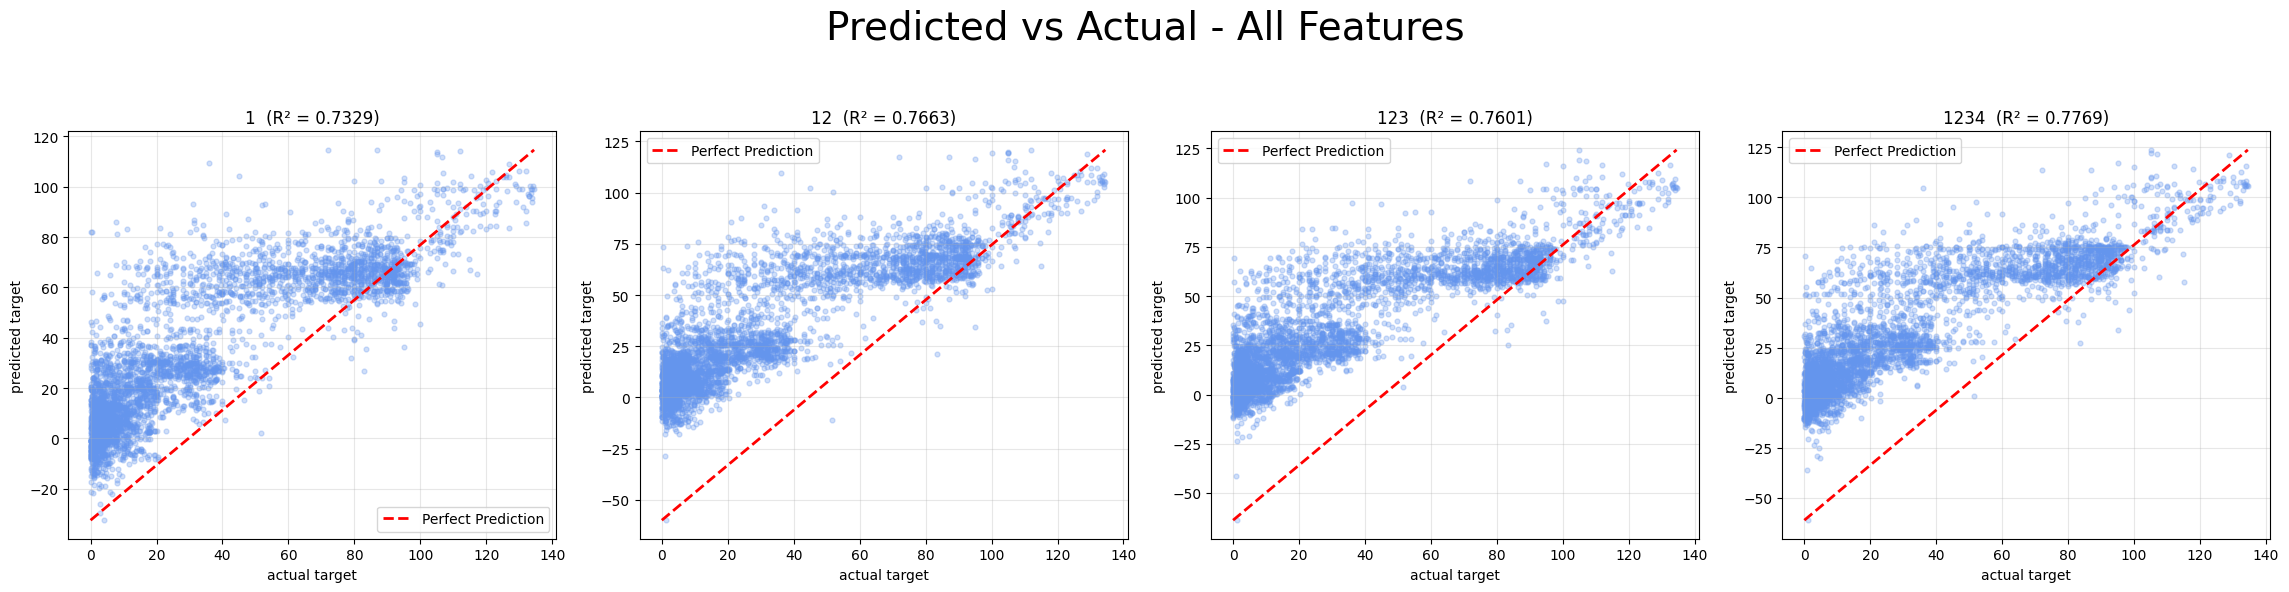

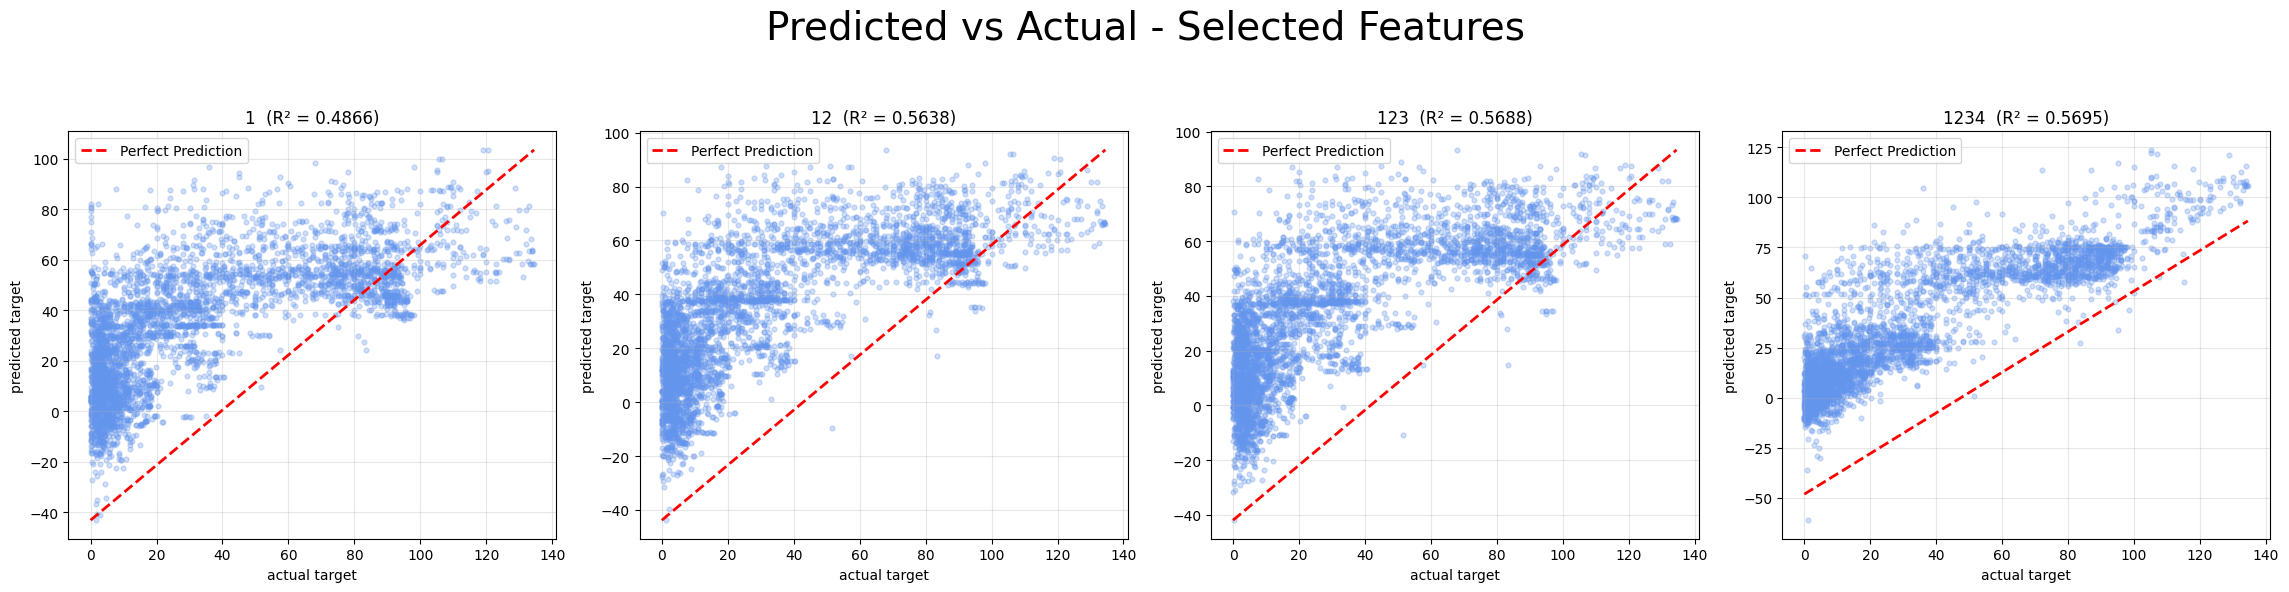

In [27]:
fig1 = plt.figure(figsize=(23,6))
fig1.suptitle('Predicted vs Actual - All Features\n', fontsize=28)

plt.subplot(1,4,1)
plt.scatter(y_test_all, y1_pred_test, alpha=0.3 , s=12, color='cornflowerblue')
plt.plot([y_test_all.min(), y_test_all.max()], [y1_pred_test.min(), y1_pred_test.max()], "r--", linewidth=2, label="Perfect Prediction")
plt.xlabel('actual target')
plt.ylabel('predicted target')
plt.title(f'1  (R² = {test1_r2:.4f})')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1,4,2)
plt.scatter(y_test_all, y12_pred_test, alpha=0.3 , s=12, color='cornflowerblue')
plt.plot([y_test_all.min(), y_test_all.max()], [y12_pred_test.min(), y12_pred_test.max()], "r--", linewidth=2, label="Perfect Prediction")
plt.xlabel('actual target')
plt.ylabel('predicted target')
plt.title(f'12  (R² = {test12_r2:.4f})')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1,4,3)
plt.scatter(y_test_all, y123_pred_test, alpha=0.3 , s=12, color='cornflowerblue')
plt.plot([y_test_all.min(), y_test_all.max()], [y123_pred_test.min(), y123_pred_test.max()], "r--", linewidth=2, label="Perfect Prediction")
plt.xlabel('actual target')
plt.ylabel('predicted target')
plt.title(f'123  (R² = {test123_r2:.4f})')
plt.legend()
plt.grid(True, alpha=0.3)


plt.subplot(1,4,4)
plt.scatter(y_test_all, y1234_pred_test, alpha=0.3 , s=12, color='cornflowerblue')
plt.plot([y_test_all.min(), y_test_all.max()], [y1234_pred_test.min(), y1234_pred_test.max()], "r--", linewidth=2, label="Perfect Prediction")
plt.xlabel('actual target')
plt.ylabel('predicted target')
plt.title(f'1234  (R² = {test1234_r2:.4f})')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n")


fig2 = plt.figure(figsize=(23,6))
fig2.suptitle('Predicted vs Actual - Selected Features\n', fontsize=28)

plt.subplot(1,4,1)
plt.scatter(y_test, y1_pred_test_slct, alpha=0.3 , s=12, color='cornflowerblue')
plt.plot([y_test.min(), y_test.max()], [y1_pred_test_slct.min(), y1_pred_test_slct.max()], "r--", linewidth=2, label="Perfect Prediction")
plt.xlabel('actual target')
plt.ylabel('predicted target')
plt.title(f'1  (R² = {test1_r2_slct:.4f})')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1,4,2)
plt.scatter(y_test, y12_pred_test_slct, alpha=0.3 , s=12, color='cornflowerblue')
plt.plot([y_test.min(), y_test.max()], [y12_pred_test_slct.min(), y12_pred_test_slct.max()], "r--", linewidth=2, label="Perfect Prediction")
plt.xlabel('actual target')
plt.ylabel('predicted target')
plt.title(f'12  (R² = {test12_r2_slct:.4f})')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1,4,3)
plt.scatter(y_test, y123_pred_test_slct, alpha=0.3 , s=12, color='cornflowerblue')
plt.plot([y_test.min(), y_test.max()], [y123_pred_test_slct.min(), y123_pred_test_slct.max()], "r--", linewidth=2, label="Perfect Prediction")
plt.xlabel('actual target')
plt.ylabel('predicted target')
plt.title(f'123  (R² = {test123_r2_slct:.4f})')
plt.legend()
plt.grid(True, alpha=0.3)


plt.subplot(1,4,4)
plt.scatter(y_test, y1234_pred_test, alpha=0.3 , s=12, color='cornflowerblue')
plt.plot([y_test.min(), y_test.max()], [y1234_pred_test_slct.min(), y1234_pred_test_slct.max()], "r--", linewidth=2, label="Perfect Prediction")
plt.xlabel('actual target')
plt.ylabel('predicted target')
plt.title(f'1234  (R² = {test1234_r2_slct:.4f})')
plt.legend()
plt.grid(True, alpha=0.3)


plt.tight_layout()
plt.show()

By adding more feature transformations (like squared and cubed terms), we start seeing some clusters/bands in the predictions. Even though the R² score is slightly better in the 1234 case, the model doesn’t perform equally well across all ranges of the target — it seems to do better in some Tc ranges and worse in others. In contrast, the simpler models give more “uniform” behavior across ranges, but that’s mostly because they tend to pull predictions toward an average value, so the overall R² remains smaller.

So my guess is that the data might have different regimes (low / mid / high Tc). If we split the dataset into, say, three Tc ranges and train separate models (or use a model that can automatically handle different regimes), we could potentially get better performance within each range.

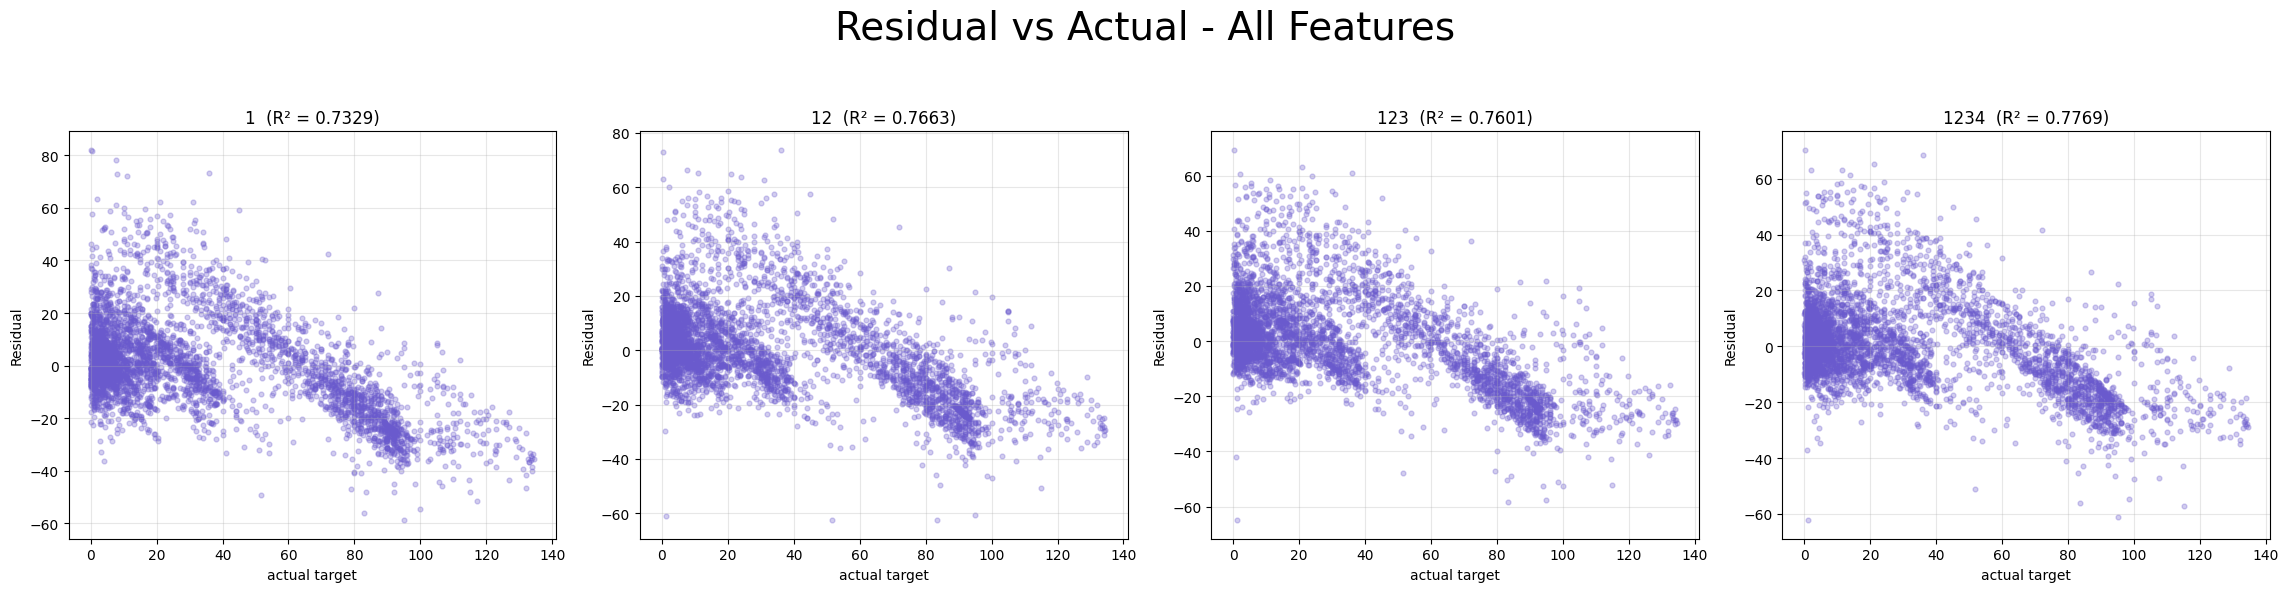

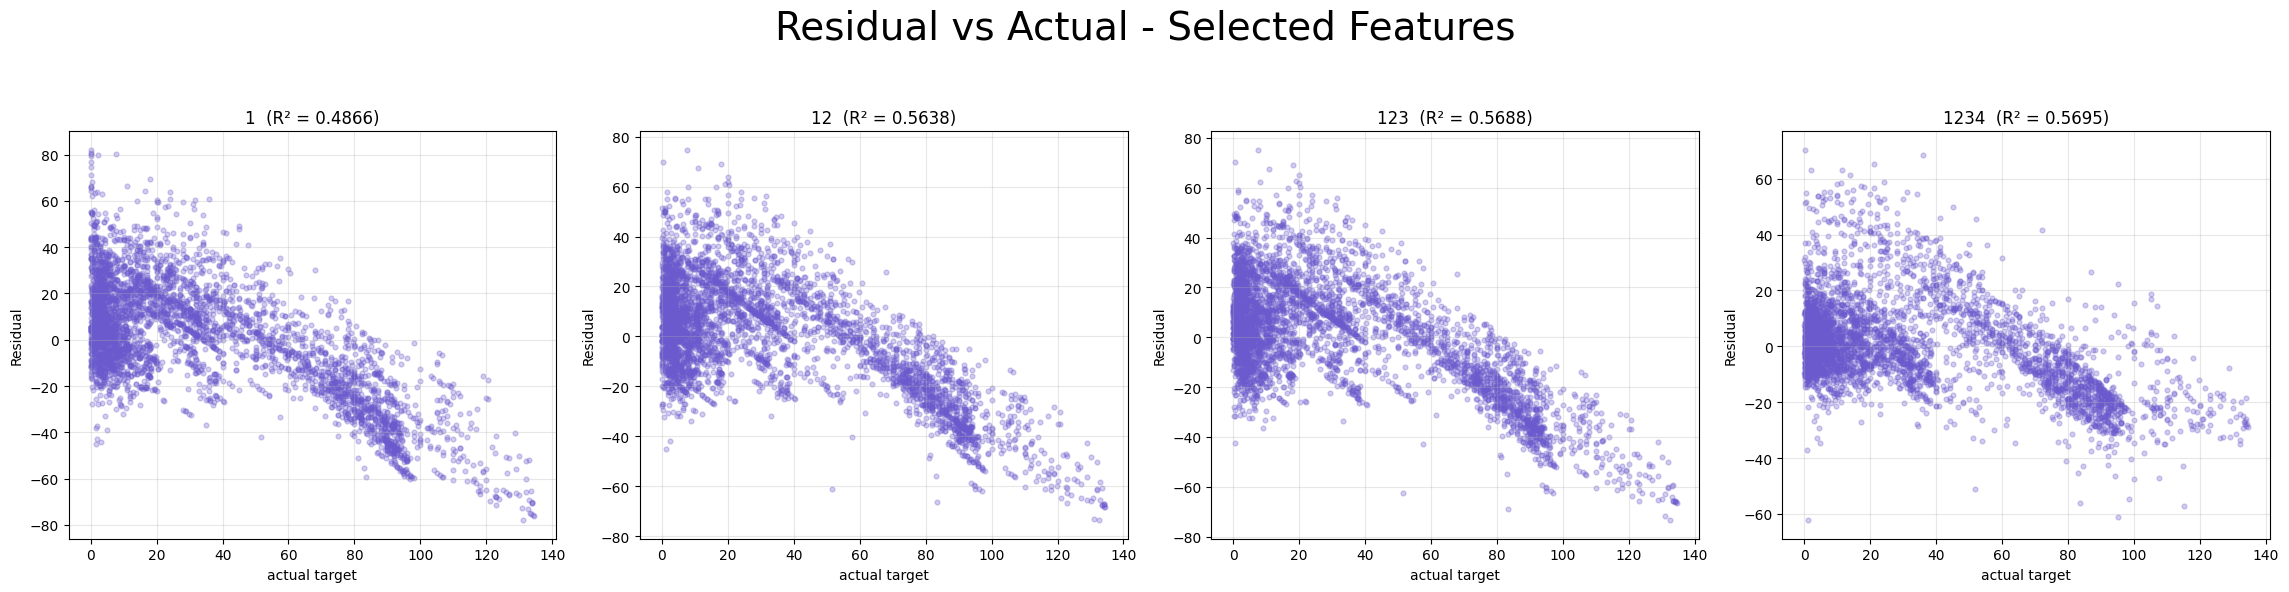

In [28]:
fig1 = plt.figure(figsize=(23,6))
fig1.suptitle('Residual vs Actual - All Features\n', fontsize=28)

plt.subplot(1,4,1)
plt.scatter(y_test_all, y1_pred_test-y_test_all, alpha=0.3 , s=12, color='slateblue')
plt.xlabel('actual target')
plt.ylabel('Residual')
plt.title(f'1  (R² = {test1_r2:.4f})')
plt.grid(True, alpha=0.3)

plt.subplot(1,4,2)
plt.scatter(y_test_all, y12_pred_test-y_test_all, alpha=0.3 , s=12, color='slateblue')
plt.xlabel('actual target')
plt.ylabel('Residual')
plt.title(f'12  (R² = {test12_r2:.4f})')
plt.grid(True, alpha=0.3)

plt.subplot(1,4,3)
plt.scatter(y_test_all, y123_pred_test-y_test_all, alpha=0.3 , s=12, color='slateblue')
plt.xlabel('actual target')
plt.ylabel('Residual')
plt.title(f'123  (R² = {test123_r2:.4f})')
plt.grid(True, alpha=0.3)


plt.subplot(1,4,4)
plt.scatter(y_test_all, y1234_pred_test-y_test_all, alpha=0.3 , s=12, color='slateblue')
plt.xlabel('actual target')
plt.ylabel('Residual')
plt.title(f'1234  (R² = {test1234_r2:.4f})')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n")


fig2 = plt.figure(figsize=(23,6))
fig2.suptitle('Residual vs Actual - Selected Features\n', fontsize=28)

plt.subplot(1,4,1)
plt.scatter(y_test, y1_pred_test_slct-y_test_all, alpha=0.3 , s=12, color='slateblue')
plt.xlabel('actual target')
plt.ylabel('Residual')
plt.title(f'1  (R² = {test1_r2_slct:.4f})')
plt.grid(True, alpha=0.3)

plt.subplot(1,4,2)
plt.scatter(y_test, y12_pred_test_slct-y_test_all, alpha=0.3 , s=12, color='slateblue')
plt.xlabel('actual target')
plt.ylabel('Residual')
plt.title(f'12  (R² = {test12_r2_slct:.4f})')
plt.grid(True, alpha=0.3)

plt.subplot(1,4,3)
plt.scatter(y_test, y123_pred_test_slct-y_test_all, alpha=0.3 , s=12, color='slateblue')
plt.xlabel('actual target')
plt.ylabel('Residual')
plt.title(f'123  (R² = {test123_r2_slct:.4f})')
plt.grid(True, alpha=0.3)

plt.subplot(1,4,4)
plt.scatter(y_test, y1234_pred_test-y_test_all, alpha=0.3 , s=12, color='slateblue')
plt.xlabel('actual target')
plt.ylabel('Residual')
plt.title(f'1234  (R² = {test1234_r2_slct:.4f})')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

These residual vs. actual plots (residual = predicted − actual) show a clear systematic pattern rather than random scatter around zero. In both the “All Features” and “Selected Features” cases, residuals tend to be positive at low Tc and increasingly negative at high Tc, which means the model generally overestimates small target values and underestimates large target values (a regression-to-the-mean effect). The spread of residuals is also not constant across the target range, indicating heteroscedasticity (the error variance changes with Tc), and the presence of visually distinct bands suggests possible regime/cluster structure in the data. While adding polynomial-style feature transformations improves the overall R² slightly for the all-features models, the main bias trend (the downward residual slope) remains, and the selected-feature models show larger dispersion and lower R², implying that a single global linear model still struggles to fit all Tc ranges equally well.

# **After Learnign about Pipeline and PolnomialFeatures :)**

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import math


data_arr = df.to_numpy()
X = data_arr[:,:-1]
y = data_arr[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipe1 = Pipeline([
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ("regressor", Ridge(alpha=1.0, random_state=42))
])

pipe1.fit(X_train, y_train)
prediction1 = pipe1.predict(X_train)
prediction2 = pipe1.predict(X_test)

rmse1 = np.sqrt(mean_squared_error(y_train, prediction1))
r21 = r2_score(y_train, prediction1)

rmse2 = np.sqrt(mean_squared_error(y_test, prediction2))
r22 = r2_score(y_test, prediction2)


print("Train:")
print("rmse:", rmse1)
print("r2:", r21)

print("\nTest:")
print("rmse:", rmse2)
print("r2:", r22)

Train:
rmse: 12.387075669938604
r2: 0.8698340799275228

Test:
rmse: 12.946038860743599
r2: 0.8543977342227997


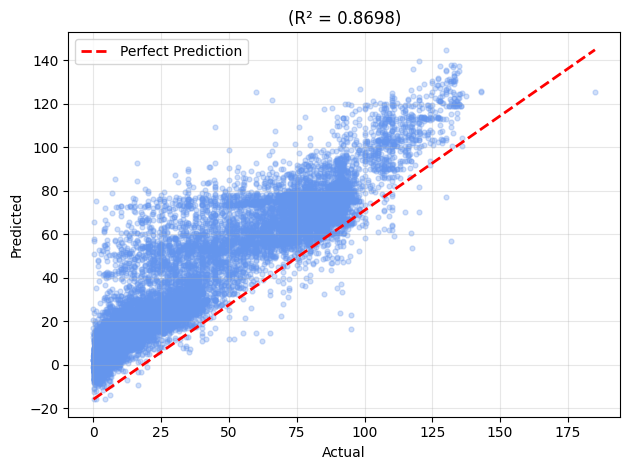

In [31]:
import matplotlib.pyplot as plt

plt.scatter(y_train, prediction1, s=12, alpha=0.3, color='cornflowerblue')
plt.plot([y_train.min(), y_train.max()], [prediction1.min(), prediction1.max()], "r--", linewidth=2, label="Perfect Prediction")
plt.title(f'(R² = {r21:.4f})')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

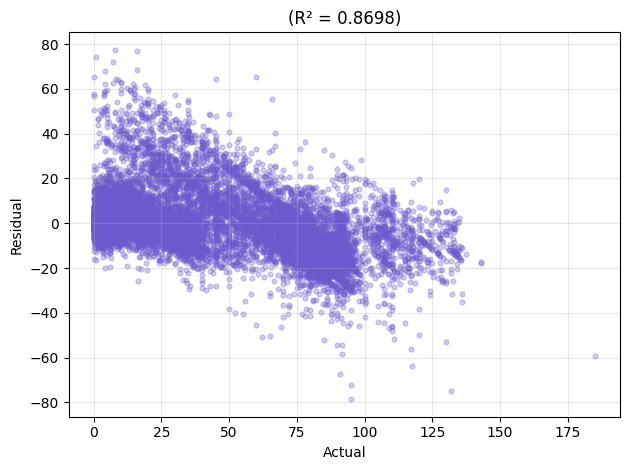

In [32]:
plt.scatter(y_train, prediction1-y_train, s=12, alpha=0.3, color='slateblue')
plt.title(f'(R² = {r21:.4f})')
plt.xlabel("Actual")
plt.ylabel("Residual")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()